In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel

<h2> EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Power_consumption/City_Power_Consumption.csv')

In [ ]:
df.head()

S no Temperature Humidity Wind Speed  general diffuse flows  diffuse flows  \
0     1       6.559     73.8      0.083                  0.051          0.119   
1     2       6.414     74.5      0.083                  0.070          0.085   
2     3       6.313     74.5       0.08                  0.062          0.100   
3     4       6.121       75      0.083                  0.091          0.096   
4     5       5.921     75.7      0.081                  0.048          0.085   

   Air Quality Index (PM)  Cloudiness   Power Consumption in A Zone  
0                   158.0           1                   34055.69620  
1                   159.0           1                   29814.68354  
2                   151.0           1                   29128.10127  
3                   151.0           1                   28228.86076  
4                   154.0           1                   27335.69620

In [ ]:
df.drop('S no', axis=1, inplace=True)

In [ ]:
df.head()

Temperature Humidity Wind Speed  general diffuse flows  diffuse flows  \
0       6.559     73.8      0.083                  0.051          0.119   
1       6.414     74.5      0.083                  0.070          0.085   
2       6.313     74.5       0.08                  0.062          0.100   
3       6.121       75      0.083                  0.091          0.096   
4       5.921     75.7      0.081                  0.048          0.085   

   Air Quality Index (PM)  Cloudiness   Power Consumption in A Zone  
0                   158.0           1                   34055.69620  
1                   159.0           1                   29814.68354  
2                   151.0           1                   29128.10127  
3                   151.0           1                   28228.86076  
4                   154.0           1                   27335.69620

In [ ]:
df.rename(columns={'general diffuse flows': 'general_diffuse_flows', 'Wind Speed': 'Wind_Speed', 'diffuse flows': 'diffuse_flows', 'Air Quality Index (PM)': 'Air_Quality_Index', ' Power Consumption in A Zone': 'Power_Consumption'}, inplace=True)

In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows',
       'diffuse_flows', 'Air_Quality_Index', 'Cloudiness',
       'Power_Consumption'],
      dtype='object')

<Axes: xlabel='Power_Consumption', ylabel='Density'>

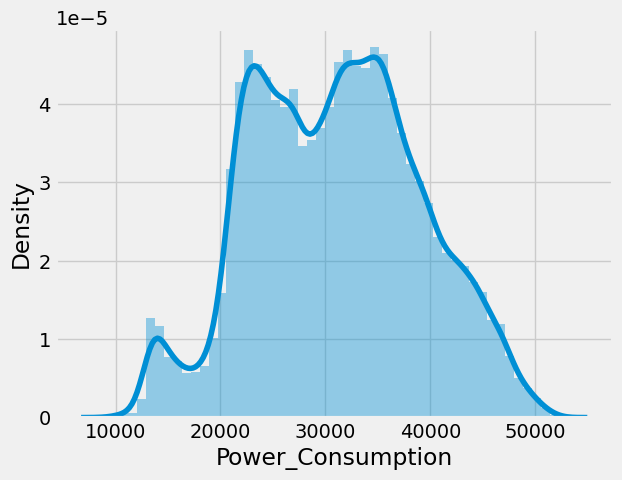

In [ ]:
sns.distplot(df['Power_Consumption'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52263 non-null  object 
 1   Humidity               52558 non-null  object 
 2   Wind_Speed             52512 non-null  object 
 3   general_diffuse_flows  52275 non-null  float64
 4   diffuse_flows          52568 non-null  float64
 5   Air_Quality_Index      52565 non-null  float64
 6   Cloudiness             52583 non-null  int64  
 7   Power_Consumption      52583 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
df.describe(include='all').T

count unique    top  freq          mean          std  \
Temperature              52263   3438  20.76    56           NaN          NaN   
Humidity                 52558   4444   85.9   200           NaN          NaN   
Wind_Speed               52512    549  0.082  2296           NaN          NaN   
general_diffuse_flows  52275.0    NaN    NaN   NaN    182.964247   264.571351   
diffuse_flows          52568.0    NaN    NaN   NaN      74.87233   124.084858   
Air_Quality_Index      52565.0    NaN    NaN   NaN    154.499191     2.871553   
Cloudiness             52583.0    NaN    NaN   NaN      0.009338      0.09618   
Power_Consumption      52583.0    NaN    NaN   NaN  31061.821779  8021.057455   

                              min          25%          50%           75%  \
Temperature                   NaN          NaN          NaN           NaN   
Humidity                      NaN          NaN          NaN           NaN   
Wind_Speed                    NaN          NaN          NaN           NaN   
general_diffuse_flows       0.004        0.062        5.226         320.1   
diffuse_flows               0.011        0.122        4.412         100.5   
Air_Quality_Index           150.0        152.0        155.0         157.0   
Cloudiness                    0.0          0.0          0.0           0.0   
Power_Consumption      9457.75076  24738.85899  31189.78723  36721.582445   

                               max  
Temperature                    NaN  
Humidity                       NaN  
Wind_Speed                     NaN  
general_diffuse_flows       1163.0  
diffuse_flows                936.0  
Air_Quality_Index            159.0  
Cloudiness                     1.0  
Power_Consumption      52204.39512

In [ ]:
import re

In [ ]:
match_df = df['Temperature'].dropna().str.contains(r'[0-9]+ [A-Za-z]+')

In [ ]:
df.head()

Temperature Humidity Wind_Speed  general_diffuse_flows  diffuse_flows  \
0       6.559     73.8      0.083                  0.051          0.119   
1       6.414     74.5      0.083                  0.070          0.085   
2       6.313     74.5       0.08                  0.062          0.100   
3       6.121       75      0.083                  0.091          0.096   
4       5.921     75.7      0.081                  0.048          0.085   

   Air_Quality_Index  Cloudiness  Power_Consumption  
0              158.0           1        34055.69620  
1              159.0           1        29814.68354  
2              151.0           1        29128.10127  
3              151.0           1        28228.86076  
4              154.0           1        27335.69620

In [ ]:
df.dropna(subset=['Temperature'])[match_df]

Temperature Humidity Wind_Speed  general_diffuse_flows  diffuse_flows  \
470     5.488 dc     87.1      0.087                  0.029          0.134   
1757    13.65 CD     85.3      0.076                    NaN          0.178   
2287    12.31 dc    58.24      0.079                    NaN          0.111   

      Air_Quality_Index  Cloudiness  Power_Consumption  
470               152.0           0        15337.38602  
1757              158.0           0        13422.49240  
2287              153.0           0        26418.23708

In [ ]:
df['Temperature'] = np.where(df['Temperature'] == "5.488 dc", "5.488", df['Temperature'])
df['Temperature'] = np.where(df['Temperature'] == "13.65 CD", "13.65", df['Temperature'])
df['Temperature'] = np.where(df['Temperature'] == "12.31 dc", "12.31", df['Temperature'])

In [ ]:
df['Temperature'] = df['Temperature'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52263 non-null  float64
 1   Humidity               52558 non-null  object 
 2   Wind_Speed             52512 non-null  object 
 3   general_diffuse_flows  52275 non-null  float64
 4   diffuse_flows          52568 non-null  float64
 5   Air_Quality_Index      52565 non-null  float64
 6   Cloudiness             52583 non-null  int64  
 7   Power_Consumption      52583 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
df['Humidity'].astype('float')

ValueError: ignored

In [ ]:
humidity_df = df['Humidity'].dropna().str.contains(r'[0-9]+ [A-Za-z]+')
df.dropna(subset=['Humidity'])[humidity_df]

Temperature Humidity Wind_Speed  general_diffuse_flows  diffuse_flows  \
719         9.11   84.8 i      0.088                  0.033          0.156   

     Air_Quality_Index  Cloudiness  Power_Consumption  
719              155.0           0        19575.68389

In [ ]:
df['Humidity'] = np.where(df['Humidity'] == "84.8 i", "84.8", df['Humidity'])

In [ ]:
df['Humidity'] = df['Humidity'].astype('float')

In [ ]:
df['Wind_Speed'].astype('float')

ValueError: ignored

In [ ]:
Wind_Speed_df = df['Wind_Speed'].dropna().str.contains(r'[0-9]+%')
df.dropna(subset=['Wind_Speed'])[Wind_Speed_df]

Temperature  Humidity Wind_Speed  general_diffuse_flows  diffuse_flows  \
41          4.29      77.0      8.50%                  0.033          0.193   
139        12.07      70.7      8.50%                  0.033          0.078   
144        11.01      75.8      8.50%                  0.033          0.163   
174        10.03      83.8      8.50%                  0.029          0.163   

     Air_Quality_Index  Cloudiness  Power_Consumption  
41               158.0           1        12908.20669  
139              151.0           1        20768.38906  
144              156.0           1        18047.41641  
174              153.0           1        13517.32523

In [ ]:
df['Wind_Speed'] = np.where(df['Wind_Speed'] == "8.50%", "8.50", df['Wind_Speed'])

In [ ]:
df['Wind_Speed'] = df['Wind_Speed'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52263 non-null  float64
 1   Humidity               52558 non-null  float64
 2   Wind_Speed             52512 non-null  float64
 3   general_diffuse_flows  52275 non-null  float64
 4   diffuse_flows          52568 non-null  float64
 5   Air_Quality_Index      52565 non-null  float64
 6   Cloudiness             52583 non-null  int64  
 7   Power_Consumption      52583 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


In [ ]:
df.describe(include='all').T

count          mean          std         min  \
Temperature            52263.0     18.827384     5.813293     3.24700   
Humidity               52558.0     68.285770    15.545170    11.34000   
Wind_Speed             52512.0      1.955961     2.348552     0.05000   
general_diffuse_flows  52275.0    182.964247   264.571351     0.00400   
diffuse_flows          52568.0     74.872330   124.084858     0.01100   
Air_Quality_Index      52565.0    154.499191     2.871553   150.00000   
Cloudiness             52583.0      0.009338     0.096180     0.00000   
Power_Consumption      52583.0  31061.821779  8021.057455  9457.75076   

                               25%          50%           75%          max  
Temperature               14.43000     18.82000     22.910000     40.01000  
Humidity                  58.33000     69.88500     81.400000     94.80000  
Wind_Speed                 0.07800      0.08600      4.915000      8.50000  
general_diffuse_flows      0.06200      5.22600    320.100000   1163.00000  
diffuse_flows              0.12200      4.41200    100.500000    936.00000  
Air_Quality_Index        152.00000    155.00000    157.000000    159.00000  
Cloudiness                 0.00000      0.00000      0.000000      1.00000  
Power_Consumption      24738.85899  31189.78723  36721.582445  52204.39512

In [ ]:
df.isna().sum()

Temperature              320
Humidity                  25
Wind_Speed                71
general_diffuse_flows    308
diffuse_flows             15
Air_Quality_Index         18
Cloudiness                 0
Power_Consumption          0
dtype: int64

In [ ]:
(df.isna().sum() / len(df)) * 100

Temperature              0.608562
Humidity                 0.047544
Wind_Speed               0.135025
general_diffuse_flows    0.585741
diffuse_flows            0.028526
Air_Quality_Index        0.034232
Cloudiness               0.000000
Power_Consumption        0.000000
dtype: float64

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52145 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52145 non-null  float64
 1   Humidity               52145 non-null  float64
 2   Wind_Speed             52145 non-null  float64
 3   general_diffuse_flows  52145 non-null  float64
 4   diffuse_flows          52145 non-null  float64
 5   Air_Quality_Index      52145 non-null  float64
 6   Cloudiness             52145 non-null  int64  
 7   Power_Consumption      52145 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.6 MB


In [ ]:
df.isna().sum()

Temperature              0
Humidity                 0
Wind_Speed               0
general_diffuse_flows    0
diffuse_flows            0
Air_Quality_Index        0
Cloudiness               0
Power_Consumption        0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.describe()

Temperature      Humidity    Wind_Speed  general_diffuse_flows  \
count  52145.000000  52145.000000  52145.000000           52145.000000   
mean      18.840984     68.238597      1.969080             182.861960   
std        5.810479     15.571295      2.351476             264.757717   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.430000     58.270000      0.078000               0.062000   
50%       18.840000     69.850000      0.086000               4.987000   
75%       22.920000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      8.500000            1163.000000   

       diffuse_flows  Air_Quality_Index    Cloudiness  Power_Consumption  
count   52145.000000       52145.000000  52145.000000       52145.000000  
mean       75.195083         154.499530      0.007038       31112.183719  
std       124.433309           2.872062      0.083598        8008.047631  
min         0.011000         150.000000      0.000000        9457.750760  
25%         0.122000         152.000000      0.000000       24804.551420  
50%         4.411000         155.000000      0.000000       31236.196720  
75%       101.300000         157.000000      0.000000       36763.076920  
max       936.000000         159.000000      1.000000       52204.395120

<Axes: >

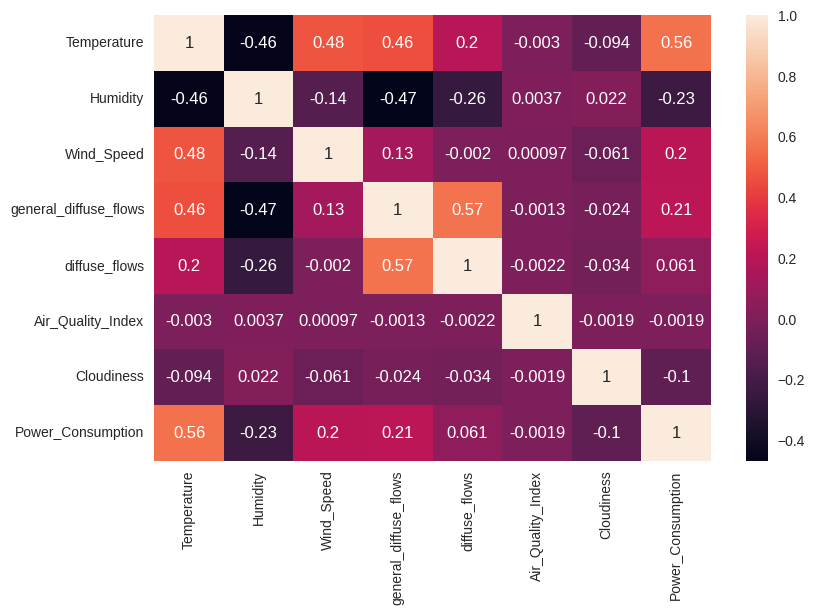

In [ ]:
sns.heatmap(df.corr(), annot=True)

Temperature
Humidity
Wind_Speed
general_diffuse_flows
diffuse_flows
Air_Quality_Index
Cloudiness


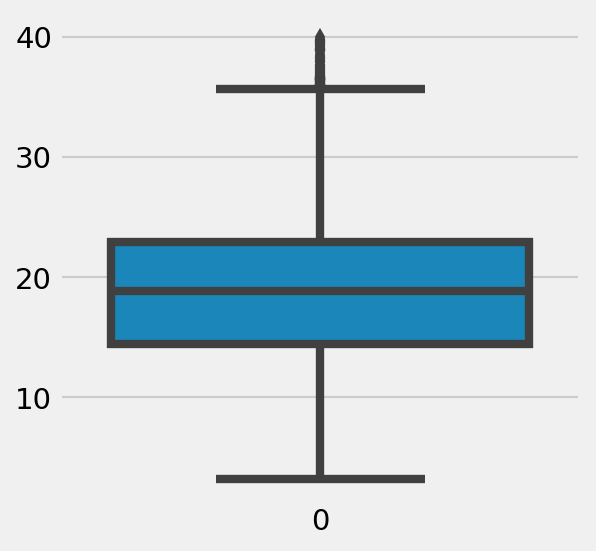

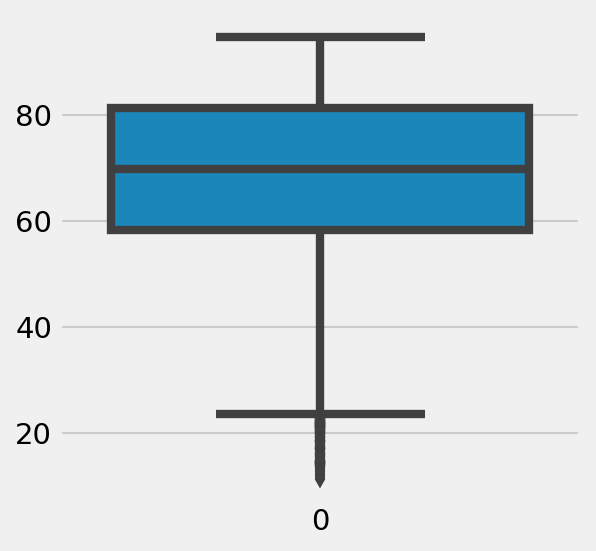

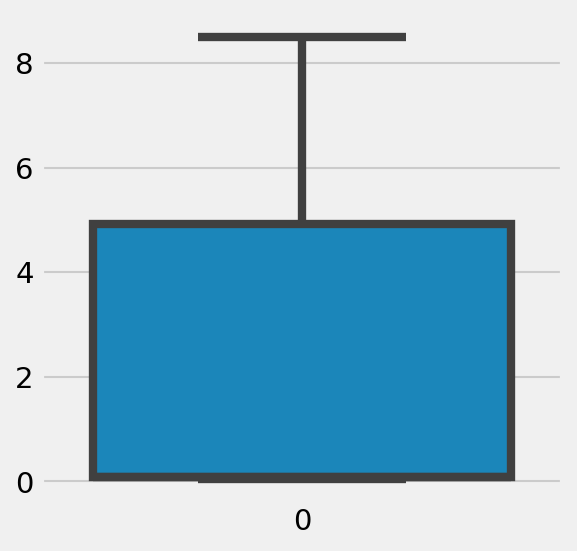

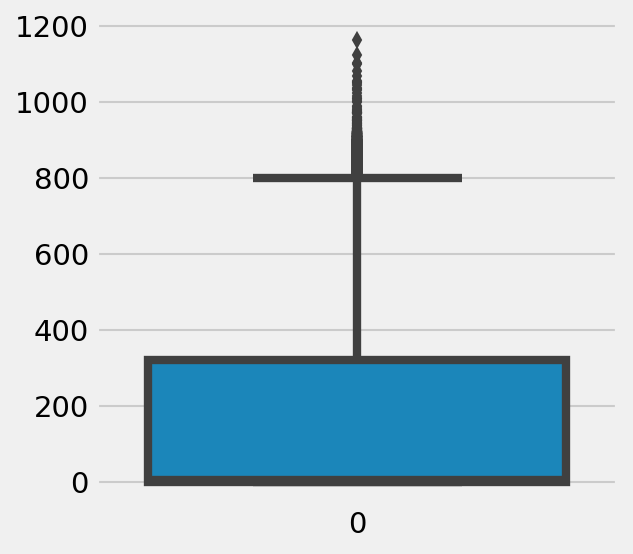

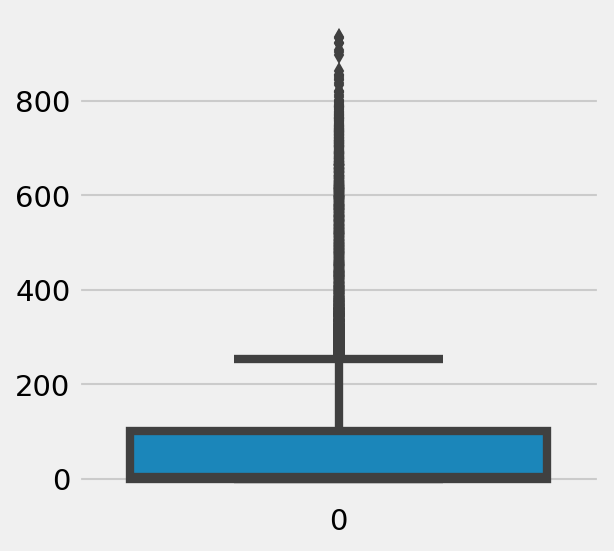

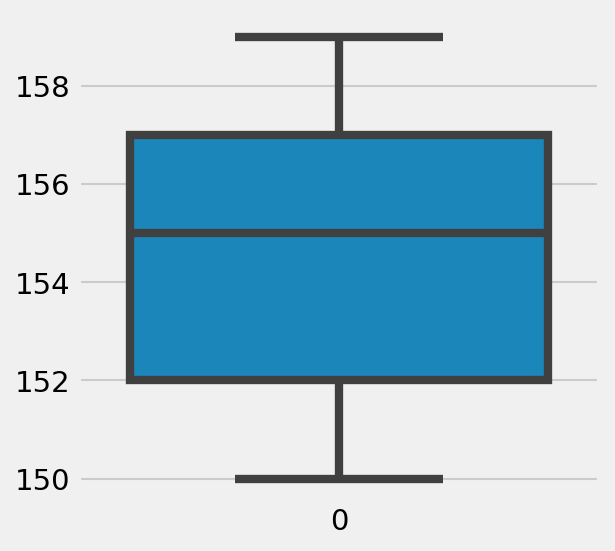

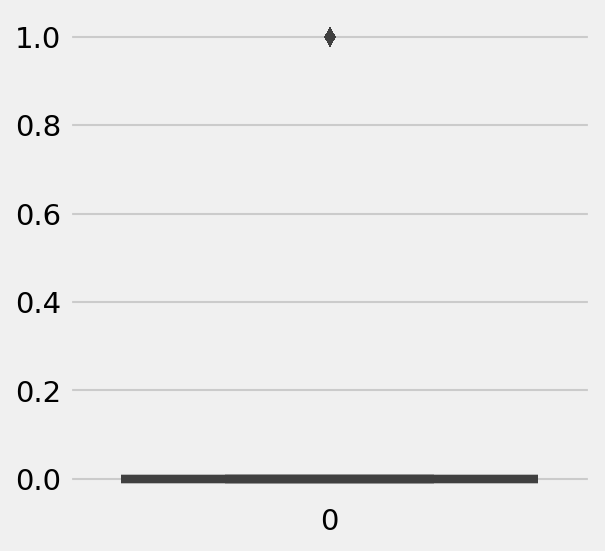

In [ ]:
for ele in df.columns:
  if ele != 'Power_Consumption':
    plt.figure(figsize=(4,4), dpi=150)
    sns.boxplot(df[ele])
plt.show()

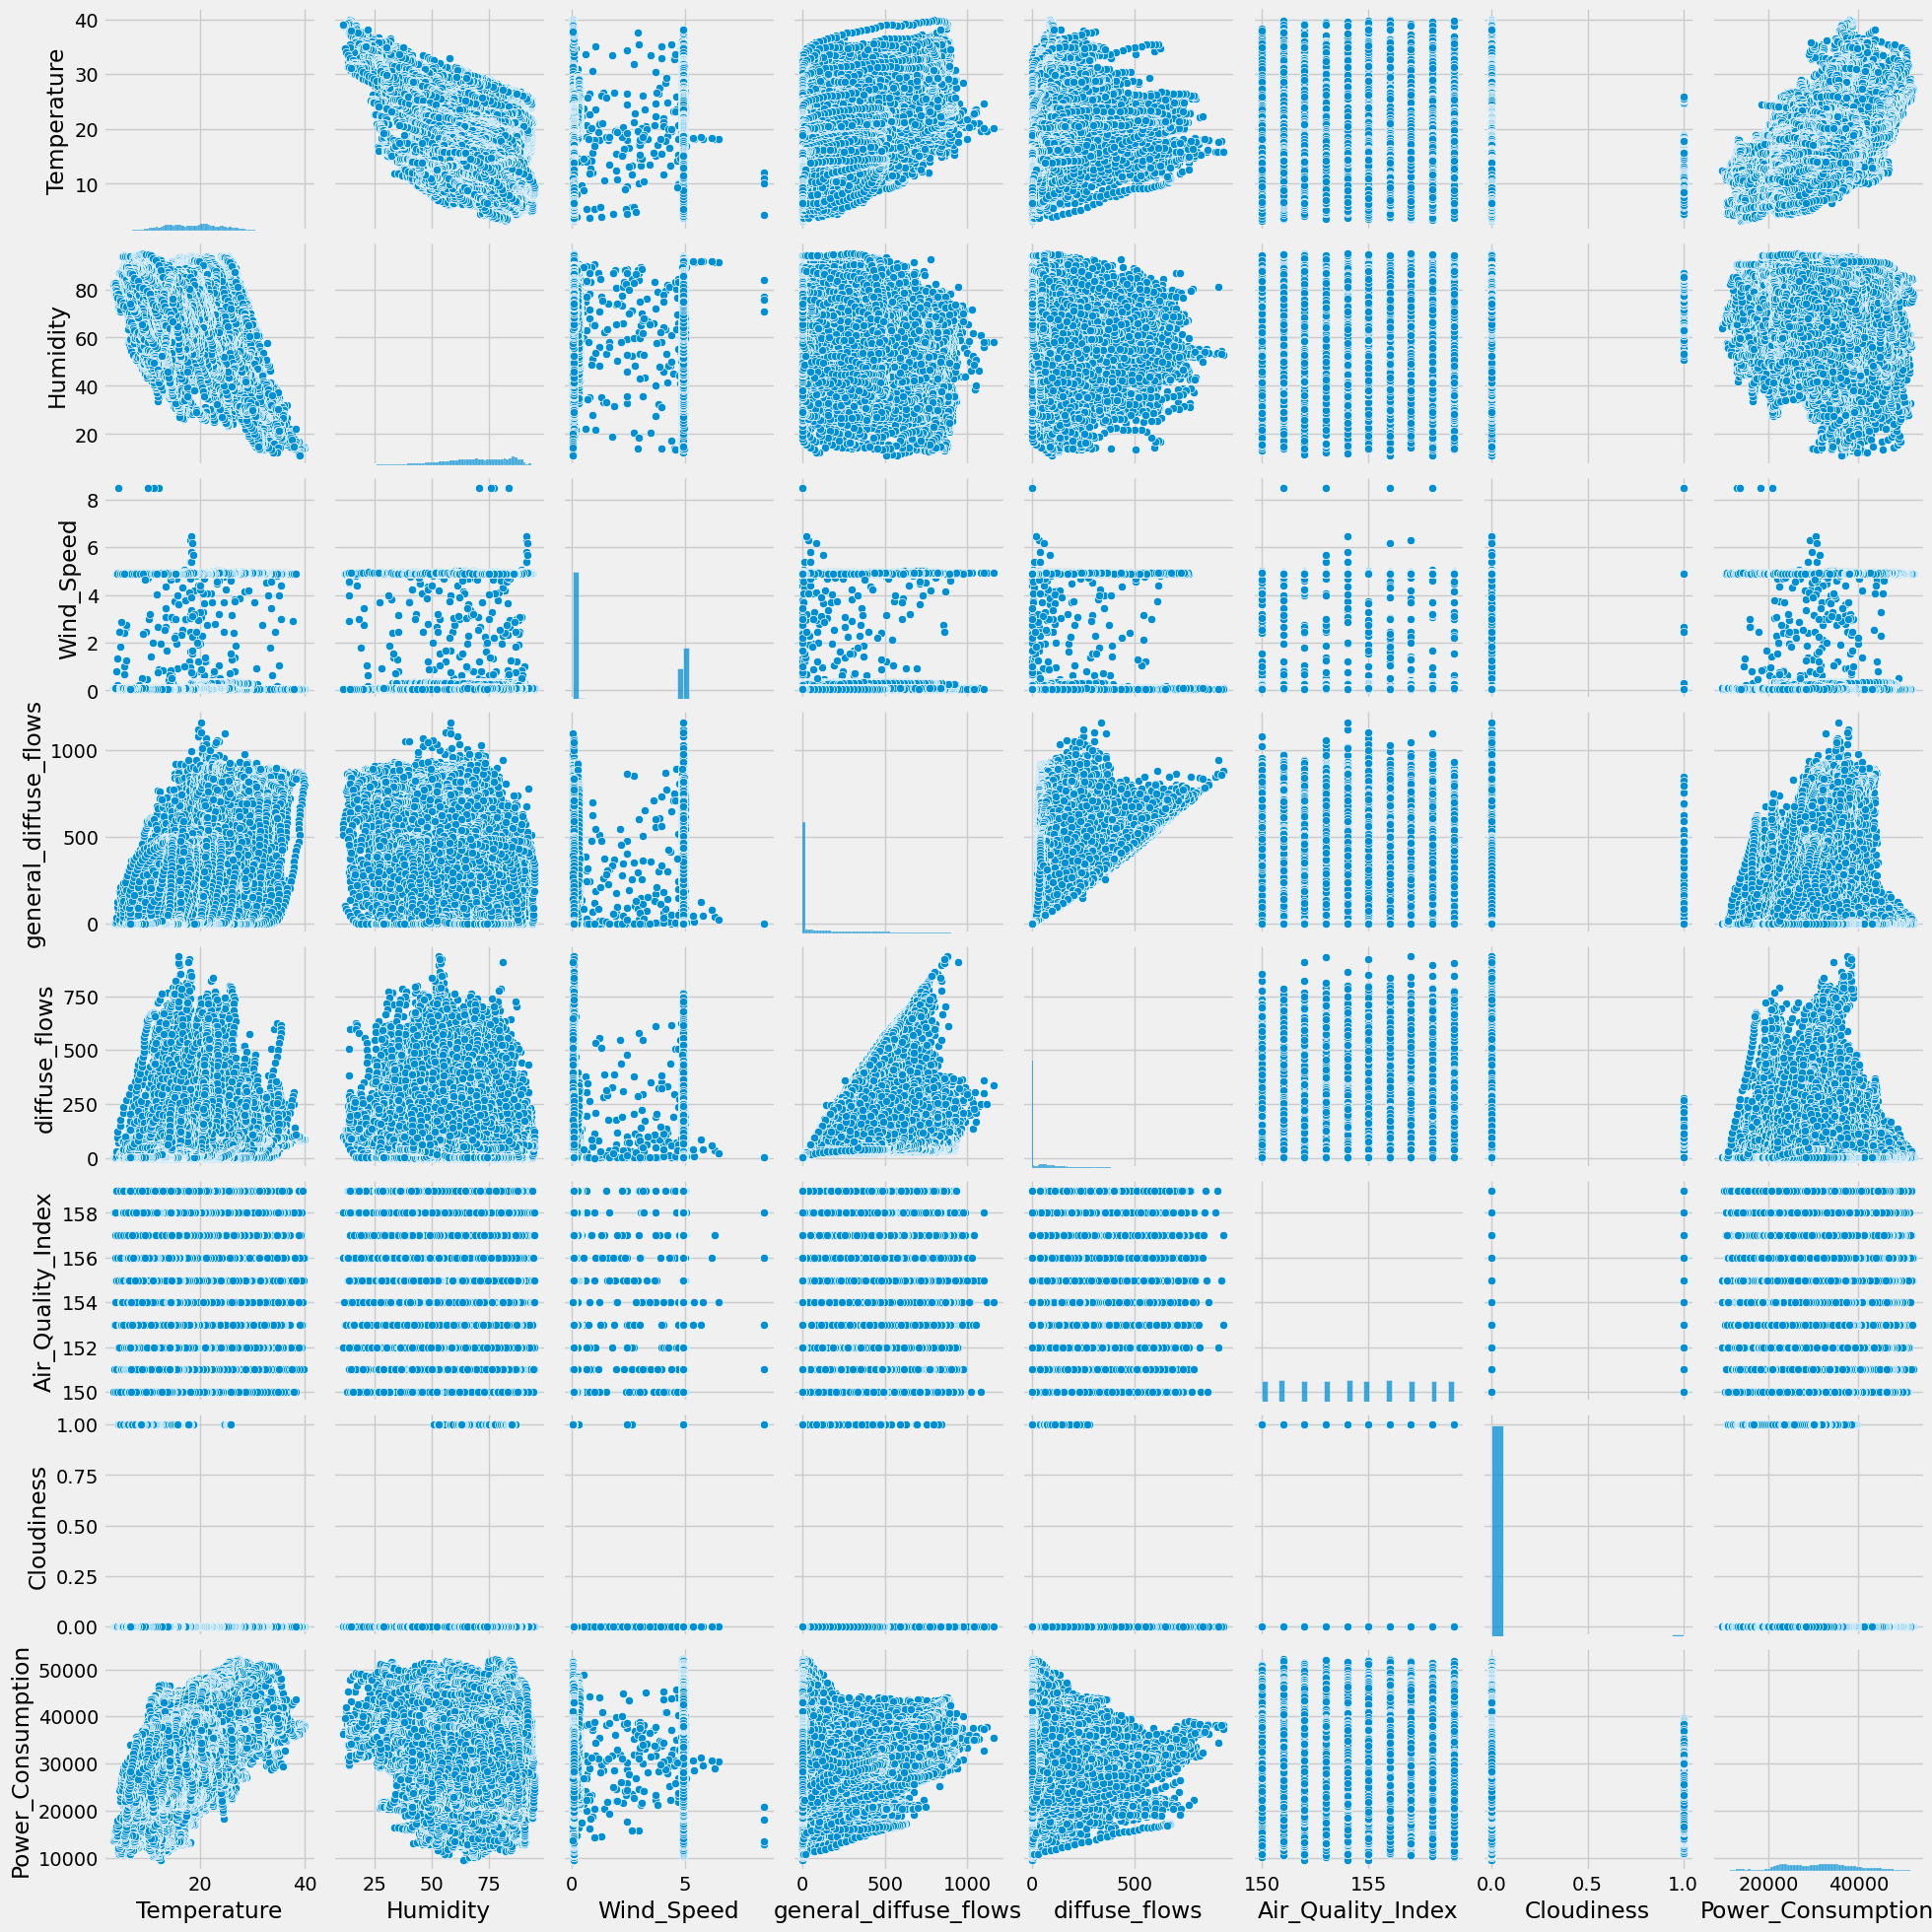

In [ ]:
sns.pairplot(df)

In [ ]:
for ele in df.columns:
  print(ele)
  print(df[ele].nunique())

Temperature
3426
Humidity
4443
Wind_Speed
549
general_diffuse_flows
10489
diffuse_flows
10419
Air_Quality_Index
10
Cloudiness
2
Power_Consumption
27545


In [ ]:
df['Air_Quality_Index'].value_counts()

156.0    5317
151.0    5294
154.0    5287
158.0    5273
155.0    5212
150.0    5204
159.0    5188
152.0    5166
153.0    5103
157.0    5101
Name: Air_Quality_Index, dtype: int64

In [ ]:
df['Air_Quality_Index'] = df['Air_Quality_Index'].astype(object)
df['Cloudiness'] = df['Cloudiness'].astype(object)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

<h2> Building model

In [ ]:
X=df.drop('Power_Consumption',axis=1)
X.head()

Temperature  Humidity  Wind_Speed  general_diffuse_flows  diffuse_flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   Air_Quality_Index_151.0  Air_Quality_Index_152.0  Air_Quality_Index_153.0  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        1                        0                        0   
3                        1                        0                        0   
4                        0                        0                        0   

   Air_Quality_Index_154.0  Air_Quality_Index_155.0  Air_Quality_Index_156.0  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        1                        0                        0   

   Air_Quality_Index_157.0  Air_Quality_Index_158.0  Air_Quality_Index_159.0  \
0                        0                        1                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Cloudiness_1  
0             1  
1             1  
2             1  
3             1  
4             1

In [ ]:
y=df['Power_Consumption']

In [ ]:
! pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle =True)

In [ ]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (41716, 15)
X_test shape is  (10429, 15)
y_train shape is  (41716,)
y_test shape is  (10429,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2=r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2))
    print('MAE:', mean_absolute_error(y_test,y_prediction))
    print('MSE:', mean_squared_error(y_test,y_prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

In [ ]:
random_forest_model = RandomForestRegressor()

In [ ]:
max_depth=[5, 6, 7]
min_samples_split= [5,10,15,200]
min_samples_leaf= [5,10, 15, 200]

In [ ]:
param_grid={
    'max_depth':max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
    }

In [ ]:
rf_model=GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs= -1)

In [ ]:
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 200],
                         'min_samples_split': [5, 10, 15, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
random_forest_model = rf_model.best_estimator_

Training score : 0.46976986512591445
predictions are: 
 [29559.99785375 34122.32311626 36699.98397054 ... 36031.81822968
 30904.50260766 40002.30606533]


r2 score: 0.455637311823786
MAE: 4590.324638737637
MSE: 35037023.16597079
RMSE: 5919.207984686024


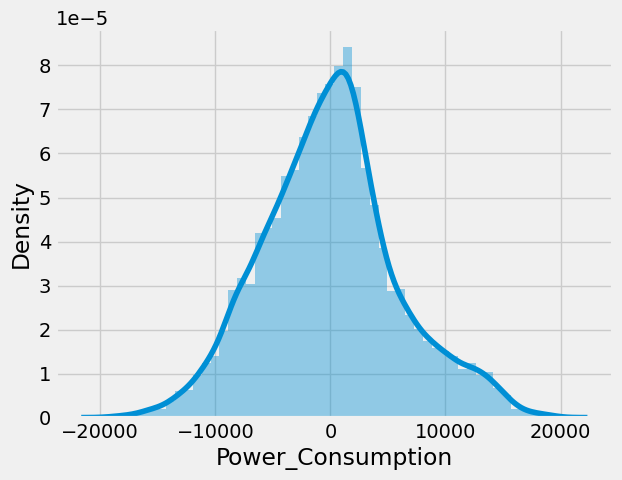

In [ ]:
predict(random_forest_model)

In [ ]:
gradient_model = GradientBoostingRegressor(learning_rate=0.1,)

In [ ]:
ada_model = AdaBoostRegressor(learning_rate=0.1,)

In [ ]:
param_grid={
    'n_estimators': [100, 200, 500]
    }

In [ ]:
grad_model=GridSearchCV(estimator=gradient_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs= -1)

In [ ]:
adaboost_model=GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs= -1)

In [ ]:
grad_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
adaboost_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(learning_rate=0.1), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grad_model = grad_model.best_estimator_

In [ ]:
ada_model = adaboost_model.best_estimator_

Training score : 0.5111703745266406
predictions are: 
 [31995.93848222 32350.73736978 37993.93679998 ... 36870.10945422
 30040.75020356 39077.20954418]


r2 score: 0.4775816604174685
MAE: 4470.176808930701
MSE: 33624610.69403056
RMSE: 5798.673183930145


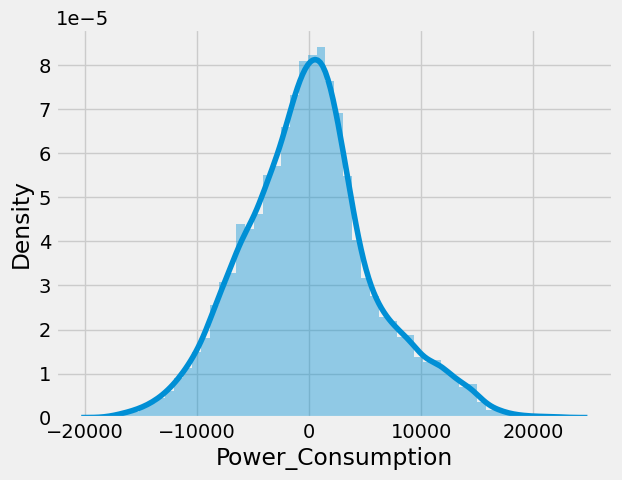

In [ ]:
predict(grad_model)

Training score : 0.3431212256419707
predictions are: 
 [29309.01676872 33578.53470054 36592.26418988 ... 36799.72792999
 31810.49641242 36799.72792999]


r2 score: 0.3417443620110192
MAE: 5325.807757181936
MSE: 42367558.50152067
RMSE: 6509.036679995026


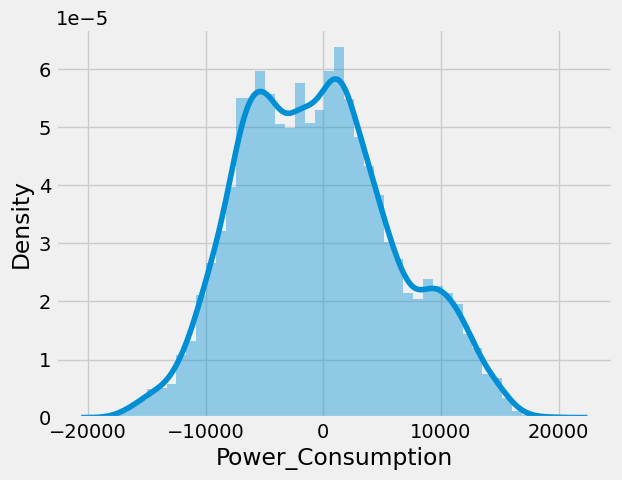

In [ ]:
predict(ada_model)

Training score : 0.3252956268722873
predictions are: 
 [28758.24710544 33565.196251   36871.82857834 ... 39945.47898364
 31978.04180421 38922.01880448]


r2 score: 0.32628273552431
MAE: 5342.041864509861
MSE: 43362721.05980214
RMSE: 6585.037665784618


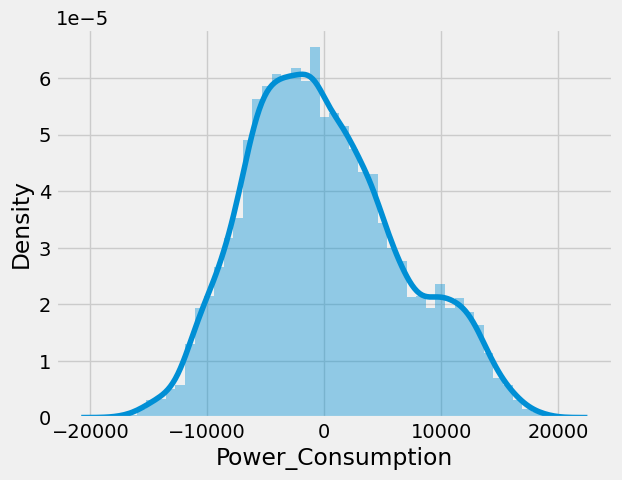

In [ ]:
predict(LinearRegression())

Training score : 0.3502918954985945
predictions are: 
 [28567.37464712 33334.61030192 38089.12355079 ... 36292.03452268
 30800.29603144 35600.65142854]


r2 score: 0.34931338874756324
MAE: 5127.833466627198
MSE: 41880390.34897767
RMSE: 6471.506034067933


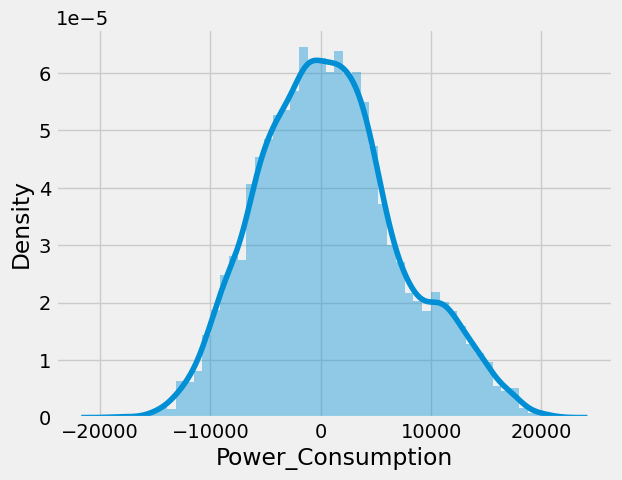

In [ ]:
predict(MLPRegressor( activation='relu' , solver='adam',
    alpha=0.1,
    batch_size=100,
    learning_rate='adaptive',
    learning_rate_init=0.5))

Training score : 0.3252955138770939
predictions are: 
 [28759.01852635 33558.08705807 36872.66315775 ... 39946.59234889
 31978.86701895 38915.14092902]


r2 score: 0.32628981219800257
MAE: 5342.0107895357005
MSE: 43362265.5811562
RMSE: 6585.003081332324


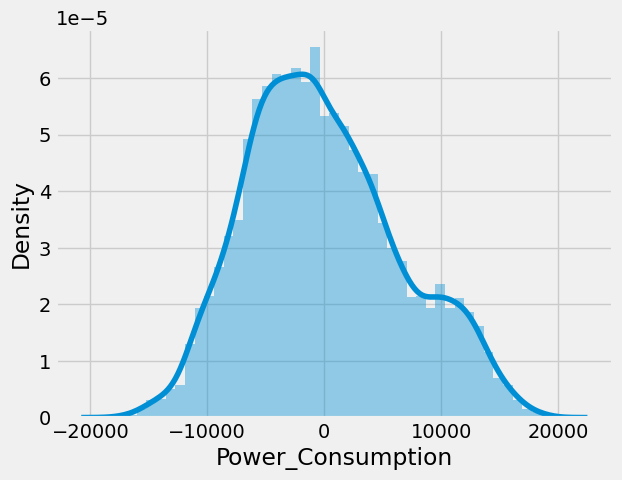

In [ ]:
predict(Lasso(alpha=.1))

Training score : 0.32292038671314693
predictions are: 
 [28684.50435347 33442.83263494 36871.27295904 ... 39963.05694071
 31983.0558309  38822.6430932 ]


r2 score: 0.3248073691238863
MAE: 5345.679396117943
MSE: 43457680.62972256
RMSE: 6592.243975288123


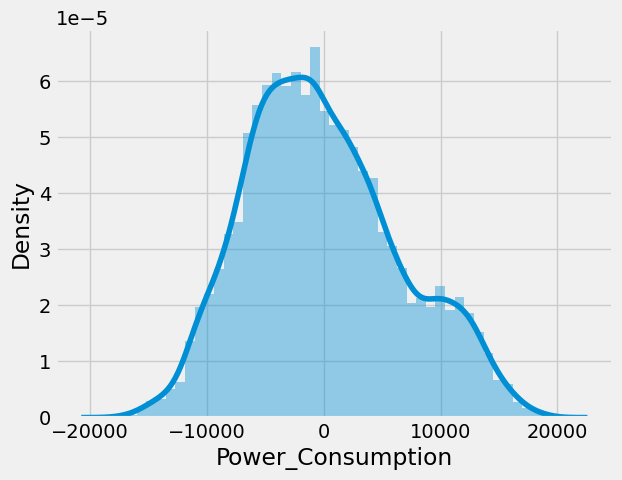

In [ ]:
predict(Ridge(solver='saga', alpha=.1))

Training score : 0.5734401847714549
predictions are: 
 [35212.145034 29516.300406 38140.28598  ... 33726.934006 27500.451072
 37089.89595 ]


r2 score: 0.35219767365502264
MAE: 4848.8614887546455
MSE: 41694748.0202235
RMSE: 6457.147049605073


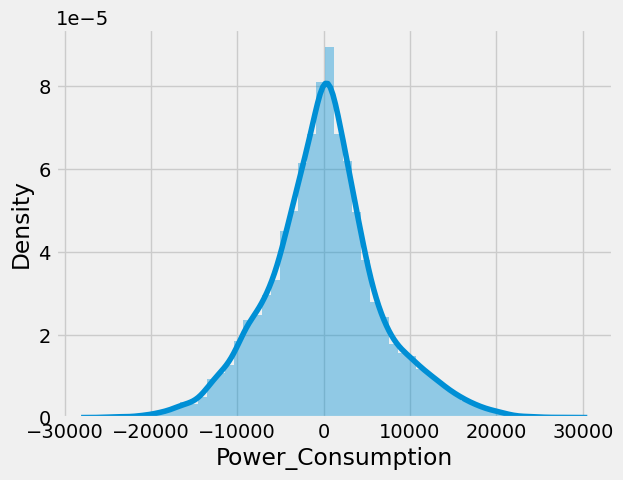

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', n_jobs=-1)
predict(knn_model)

Training score : 0.5734401847714549
predictions are: 
 [35212.145034 29516.300406 38140.28598  ... 33726.934006 27500.451072
 37089.89595 ]


r2 score: 0.35219767365502264
MAE: 4848.8614887546455
MSE: 41694748.0202235
RMSE: 6457.147049605073


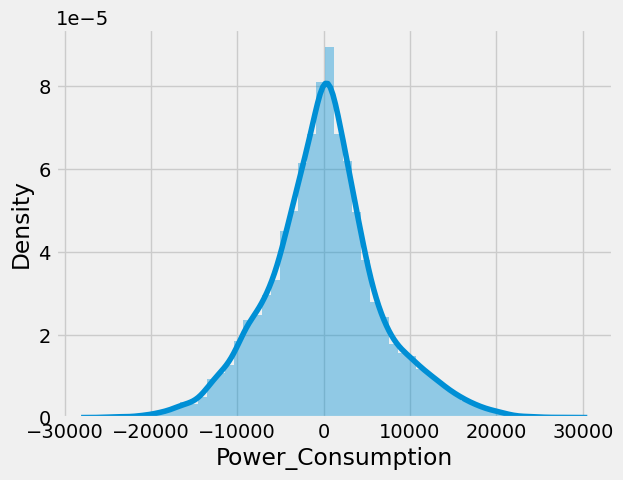

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', n_jobs=-1)
predict(knn_model)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor()

Training score : 0.6625599289032773
predictions are: 
 [34090.89  34337.44  39565.92  ... 36737.84  29121.135 39472.3  ]


r2 score: 0.5404308035301575
MAE: 4046.4047352089724
MSE: 29579427.34287502
RMSE: 5438.6972100747635


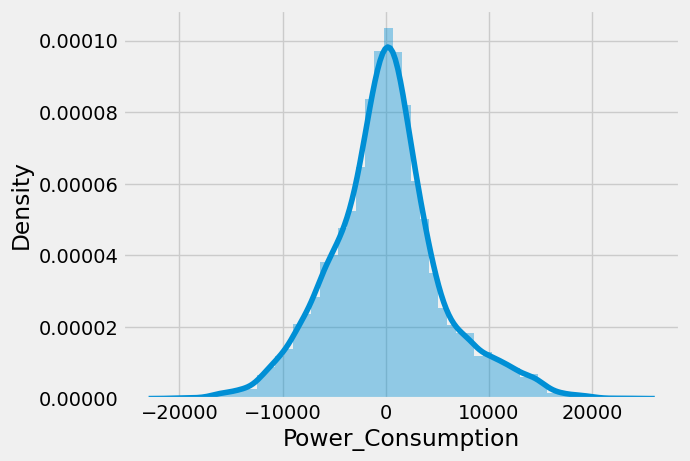

In [ ]:
predict(xgb_model)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR()

Training score : 0.034134113929439436
predictions are: 
 [29263.666369   29240.21855956 33824.28043123 ... 33725.28017153
 29227.41668442 33758.81626997]


r2 score: 0.040085328807384135
MAE: 6176.8398527480995
MSE: 61783353.82355196
RMSE: 7860.238789219572


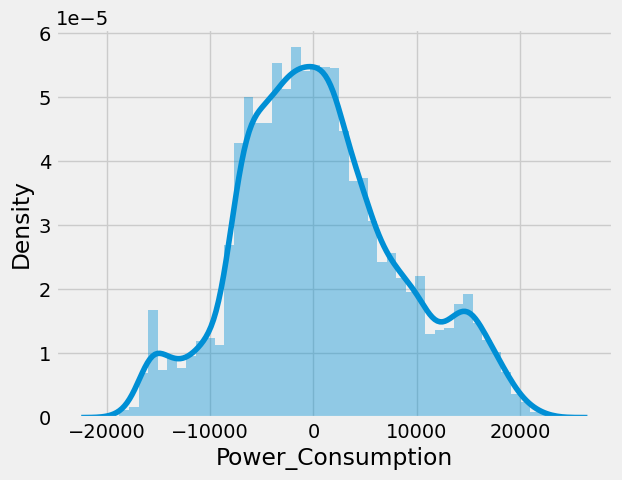

In [ ]:
predict(svr_model)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.5 MB/s eta 0:00:00


In [ ]:
import catboost as cb

In [ ]:
train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
156:	learn: 6094.6850317	test: 6122.2039822	best: 6122.2039822 (156)	total: 3.35s	remaining: 918ms
157:	learn: 6091.4546950	test: 6118.9162188	best: 6118.9162188 (157)	total: 3.36s	remaining: 894ms
158:	learn: 6088.8319947	test: 6116.6194962	best: 6116.6194962 (158)	total: 3.37s	remaining: 870ms
159:	learn: 6086.4221620	test: 6114.3305318	best: 6114.3305318 (159)	total: 3.38s	remaining: 846ms
160:	learn: 6084.5058682	test: 6112.5825374	best: 6112.5825374 (160)	total: 3.4s	remaining: 823ms
161:	learn: 6081.7307494	test: 6109.7727345	best: 6109.7727345 (161)	total: 3.41s	remaining: 800ms
162:	learn: 6078.7995324	test: 6107.3765528	best: 6107.3765528 (162)	total: 3.42s	remaining: 776ms
163:	learn: 6076.1292647	test: 6105.2831380	best: 6105.2831380 (163)	total: 3.43s	remaining: 753ms
164:	learn: 6074.4459554	test: 6103.5657521	best: 6103.5657521 (164)	total: 3.44s	remaining: 730ms
165:	learn: 6072.0074243	test: 6101.2472716	best: 6101.2472

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 5513.50
R2: 0.53


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop], validation_batch_size=128, epochs=50)

Epoch 1/50
326/326 [==============================] - 4s 6ms/step - loss: 274415584.0000 - mean_squared_error: 274415584.0000 - val_loss: 69913696.0000 - val_mean_squared_error: 69913696.0000
Epoch 2/50
326/326 [==============================] - 3s 8ms/step - loss: 75711728.0000 - mean_squared_error: 75711728.0000 - val_loss: 52493348.0000 - val_mean_squared_error: 52493348.0000
Epoch 3/50
326/326 [==============================] - 2s 6ms/step - loss: 64917840.0000 - mean_squared_error: 64917840.0000 - val_loss: 45394496.0000 - val_mean_squared_error: 45394496.0000
Epoch 4/50
326/326 [==============================] - 2s 5ms/step - loss: 60955740.0000 - mean_squared_error: 60955740.0000 - val_loss: 44739368.0000 - val_mean_squared_error: 44739368.0000
Epoch 5/50
326/326 [==============================] - 2s 5ms/step - loss: 59305196.0000 - mean_squared_error: 59305196.0000 - val_loss: 47205072.0000 - val_mean_squared_error: 47205072.0000
Epoch 6/50
326/326 [============================

<h2>Quantile Transformer

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

In [ ]:
qt = QuantileTransformer(output_distribution='normal')

In [ ]:
X_tf = qt.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, random_state=0, train_size=0.85)

In [ ]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (44323, 15)
X_test shape is  (7822, 15)
y_train shape is  (44323,)
y_test shape is  (7822,)


In [ ]:
regressor = LinearRegression()

In [ ]:
regr = TransformedTargetRegressor(regressor=regressor,transformer=qt)

Training score : 0.3231220482934206
predictions are: 
 [32884.02913922 34966.85816474 35962.38170974 ... 34061.15190063
 39117.28707139 33395.85726633]


r2 score: 0.3202357611029818
MAE: 5311.527755027541
MSE: 43489102.2579675
RMSE: 6594.62677169584


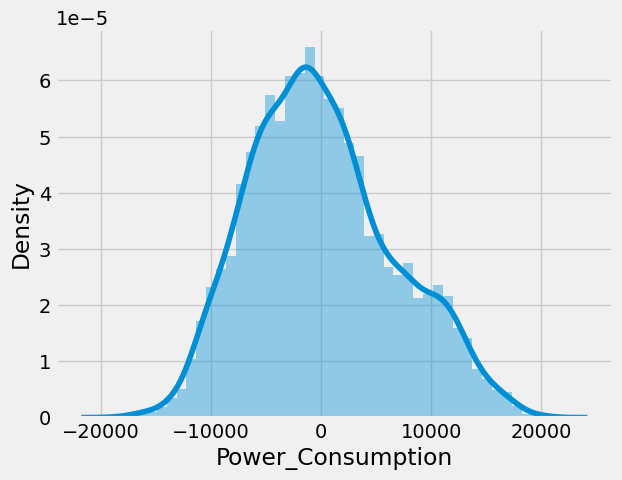

In [ ]:
predict(regr)

In [ ]:
regr = TransformedTargetRegressor(regressor=rf_model, transformer=qt)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Training score : 0.4706517553646258
predictions are: 
 [33761.10299506 33789.06184454 33912.12356815 ... 33770.05303778
 40963.82028073 34619.16192007]


r2 score: 0.4514788622300009
MAE: 4544.087921476809
MSE: 35092596.0592494
RMSE: 5923.900409295332


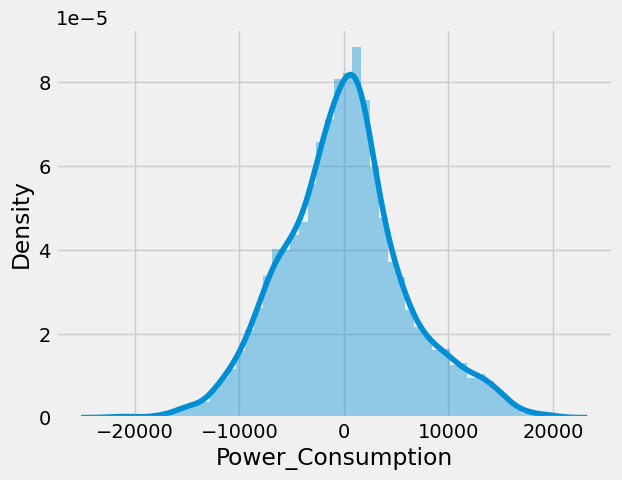

In [ ]:
predict(regr)

In [ ]:
regr = TransformedTargetRegressor(regressor=grad_model, transformer=qt)

Training score : 0.5094041409242192
predictions are: 
 [29642.46401406 35565.65374469 34483.51474789 ... 36658.18960335
 38816.25597619 35891.370747  ]


r2 score: 0.47961994516677553
MAE: 4382.468574014569
MSE: 33292221.218299963
RMSE: 5769.941179795506


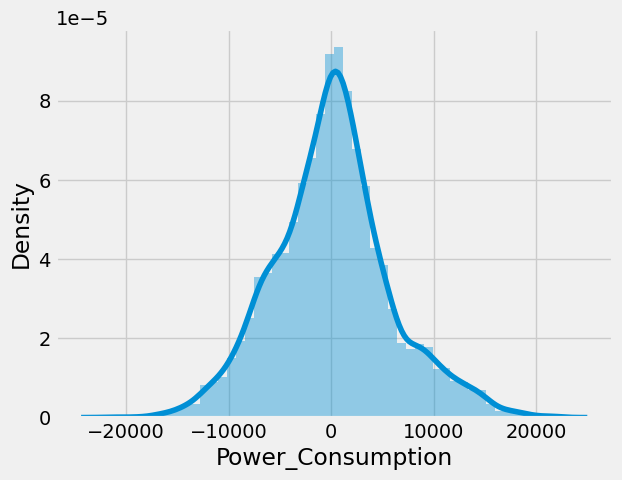

In [ ]:
predict(regr)

In [ ]:
regr = TransformedTargetRegressor(regressor=xgb_model, transformer=qt)

Training score : 0.6534108130401985
predictions are: 
 [30059.678 33668.57  32568.031 ... 33041.68  39927.418 38769.594]


r2 score: 0.5433711351156383
MAE: 3974.175787115675
MSE: 29213627.699976884
RMSE: 5404.963246866429


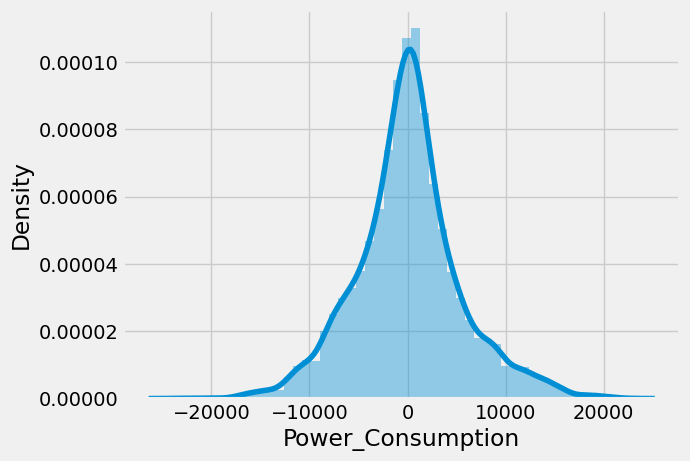

In [ ]:
predict(regr)

<h2>Pycaret

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 21.4 MB/s eta 0:0

In [ ]:
from pycaret.regression import *

In [ ]:
df.head()

Temperature  Humidity  Wind_Speed  general_diffuse_flows  diffuse_flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   Air_Quality_Index  Cloudiness  Power_Consumption  
0              158.0           1        34055.69620  
1              159.0           1        29814.68354  
2              151.0           1        29128.10127  
3              151.0           1        28228.86076  
4              154.0           1        27335.69620

In [ ]:
data = df.sample(frac=0.90, random_state=101)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (46930, 8)
Unseen Data For Predictions: (5215, 8)


In [ ]:
model = setup(data = data, target = 'Power_Consumption', session_id=123)

In [ ]:
best = compare_models(exclude = ['ransac'])

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

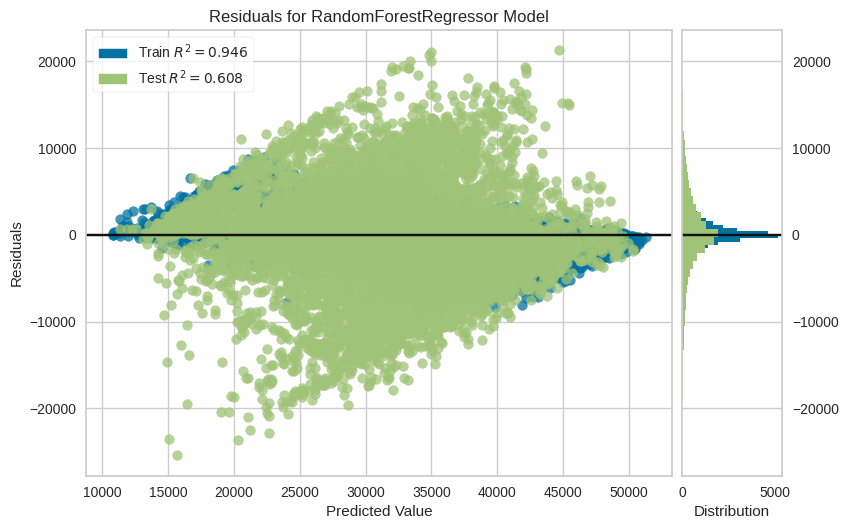

In [ ]:
plot_model(rf)

In [ ]:
et = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

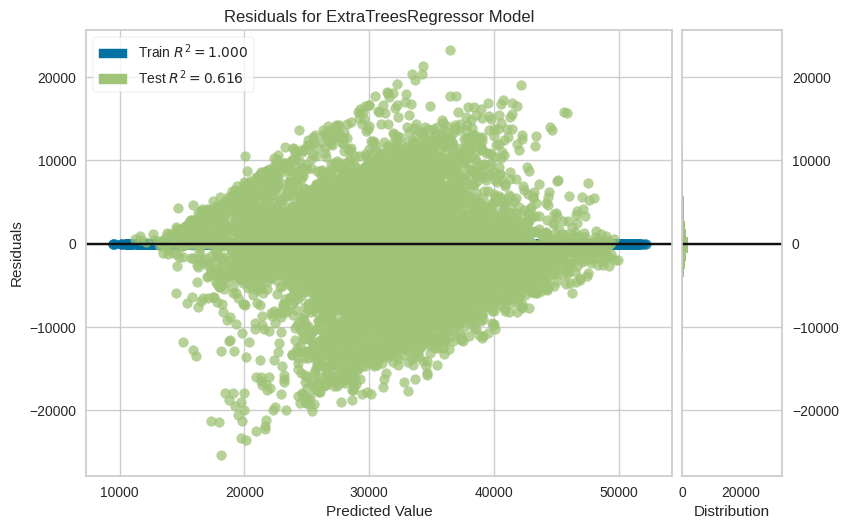

In [ ]:
plot_model(et)

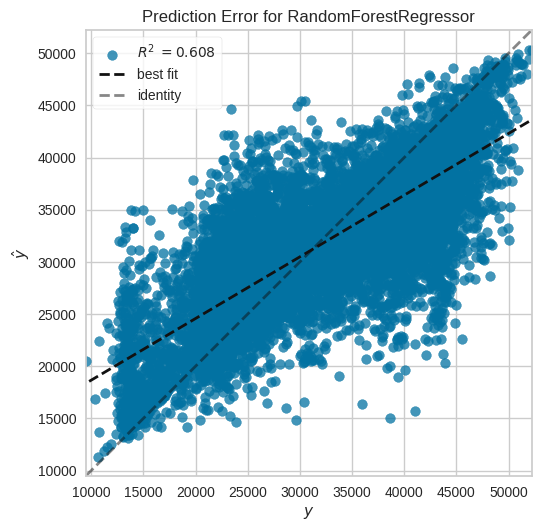

In [ ]:
plot_model(rf, plot = 'error')

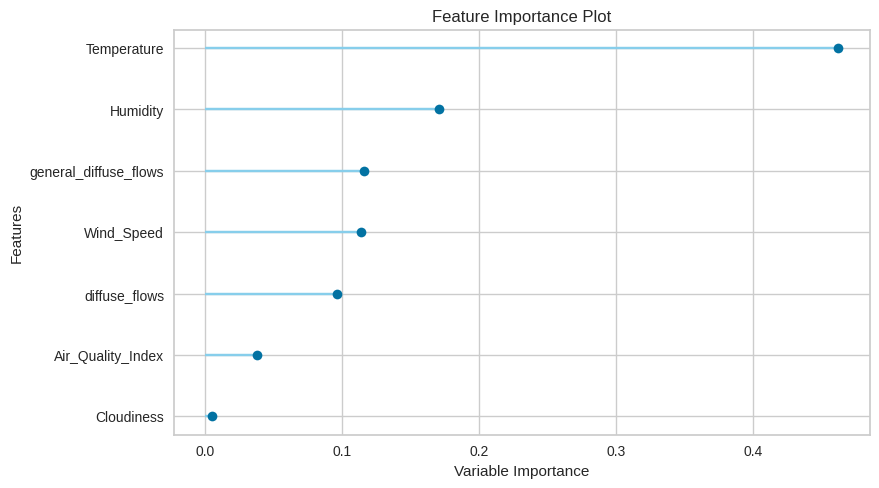

In [ ]:
plot_model(rf, plot='feature')

In [ ]:
predict_model(rf);

In [ ]:
final_rf = finalize_model(rf)

In [ ]:
save_model(final_rf, 'rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Temperature', 'Humidity',
                                              'Wind_Speed',
                                              'general_diffuse_flows',
                                              'diffuse_flows',
                                              'Air_Quality_Index',
                                              'Cloudiness'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  RandomForestRegressor(n_jobs=-1, random_state=123))]),
 'rf_model.pkl')

In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

Temperature   Humidity  Wind_Speed  general_diffuse_flows  diffuse_flows  \
0        5.034  76.900002       0.083                  0.051          0.185   
1        4.896  76.599998       0.085                  0.070          0.137   
2        5.394  71.900002       0.081                  0.073          0.100   
3        5.179  74.199997       0.083                  0.037          0.137   
4        4.658  73.500000       0.080                  0.044          0.104   

   Air_Quality_Index  Cloudiness  Power_Consumption  prediction_label  
0              153.0           1       13167.172852      13399.149014  
1              154.0           1       13137.994141      13423.185459  
2              158.0           1       12948.328125      17033.597031  
3              152.0           1       12879.027344      13514.575010  
4              154.0           1       13137.994141      16153.975918

<h2>H2O AutoML


In [ ]:
!pip uninstall scikit-learn
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153908 sha256=b8ba065f3ff23e8fd6b3e76ba6ea2dd7ad311361f027cbc49d53cec1ed546a37
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o


In [ ]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7bb1wvqs
  JVM stdout: /tmp/tmp7bb1wvqs/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7bb1wvqs/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.2
H2O_cluster_version_age:    24 days
H2O_cluster_name:           H2O_from_python_unknownUser_31gdfa
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
df.head()

Temperature  Humidity  Wind_Speed  general_diffuse_flows  diffuse_flows  \
0        6.559      73.8       0.083                  0.051          0.119   
1        6.414      74.5       0.083                  0.070          0.085   
2        6.313      74.5       0.080                  0.062          0.100   
3        6.121      75.0       0.083                  0.091          0.096   
4        5.921      75.7       0.081                  0.048          0.085   

   Air_Quality_Index  Cloudiness  Power_Consumption  
0              158.0           1        34055.69620  
1              159.0           1        29814.68354  
2              151.0           1        29128.10127  
3              151.0           1        28228.86076  
4              154.0           1        27335.69620

In [ ]:
train = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train, valid= train.split_frame(ratios = [.85], seed = 1234)

In [ ]:
x = train.columns
y = "Power_Consumption"
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models=30, seed=1, stopping_metric='rmse', )
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
12:15:06.13: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20230819_121506


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       7/30
# GBM base models (used / total)           1/10
# XGBoost base models (used / total)       4/10
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  0/7
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 7491302.217450995
RMSE: 2737.0243362913297
MAE: 1884.0334928594662
RMSLE: 0.09682967819919752
Mean Residual Deviance: 7491302.217450995
R^2: 0.8833248967044549
Null degrees of freedom: 9963
Residual degrees of freedom: 9956
Null deviance: 639788791260.7914
Residual deviance: 74643335294.68172
AIC: 186017.28598635233

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 24669379.19661835
RMSE: 4966.82788071203
MAE: 3498.854214746276
RMSLE: 0.1720275816625555
Mean Residual Deviance: 24669379.19661835
R^2: 0.6182769371465613
Null degrees of freedom: 7865
Residual degrees of freedom: 7858
Null deviance: 508351185622.3526
Residual deviance: 194049336760.5999
AIC: 156228.50377005403

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 23245282.724684738
RMSE: 4821.336197018907
MAE: 3404.88694980897
RMSLE: 0.16633817360783767
Mean Residual Deviance: 23245282.724684738
R^2: 0.6370135879894332
Null degrees of freedom: 44278
Residual degrees of freedom: 44271
Null deviance: 2835960716111.124
Residual deviance: 1029277873766.3154
AIC: 876719.610725402

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     3406.64      48.6568      3388.77       3389.28       3350.49       3479.9        3424.79
mean_residual_deviance  2.3247e+07   715198       2.30708e+07   2.29865e+07   2.23592e+07   2.42847e+07   2.35337e+07
mse                     2.3247e+07   715198       2.30708e+07   2.29865e+07   2.23592e+07   2.42847e+07   2.35337e+07
null_deviance           5.67192e+11  6.6567e+09   5.63462e+11   5.66785e+11   5.77514e+11   5.59769e+11   5.6843e+11
r2                      0.636832     0.0132368    0.635938      0.641512      0.653758      0.617064      0.635887
residual_deviance       2.05844e+11  5.32725e+09  2.05123e+11   2.03178e+11   1.99958e+11   2.14239e+11   2.0672e+11
rmse                    4821.06      74.0211      4803.21       4794.43       4728.55       4927.95       4851.16
rmsle                   0.166329     0.00290801   0.166584      0.165689      0.16322       0.171041      0.165112

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance
-------------------------------------------------------  -------  -----------  -------  --------  ------------------------
StackedEnsemble_AllModels_1_AutoML_2_20230819_121506     4821.34  2.32453e+07  3404.89  0.166338               2.32453e+07
StackedEnsemble_BestOfFamily_1_AutoML_2_20230819_121506  4829.26  2.33218e+07  3408.59  0.166653               2.33218e+07
GBM_grid_1_AutoML_2_20230819_121506_model_5              4886.17  2.38747e+07  3443.85  0.168922               2.38747e+07
DRF_1_AutoML_2_20230819_121506                           5105.2   2.60631e+07  3744.2   0.176539               2.60631e+07
GBM_4_AutoML_2_20230819_121506                           5138.48  2.6404e+07   3781.53  0.177904               2.6404e+07
XRT_1_AutoML_2_20230819_121506                           5140.47  2.64244e+07  3788.37  0.178086               2.64244e+07
XGBoost_grid_1_AutoML_2_20230819_121506_model_2          5143.39  2.64545e+07  3681.46  0.177992               2.64545e+07
XGBoost_grid_1_AutoML_2_20230819_121506_model_4          5187.46  2.69098e+07  3756.94  0.179227               2.69098e+07
GBM_3_AutoML_2_20230819_121506                           5293.92  2.80255e+07  3948.58  0.183271               2.80255e+07
GBM_1_AutoML_2_20230819_121506                           5340.64  2.85225e+07  4006.97  0.185185               2.85225e+07
XGBoost_grid_1_AutoML_2_20230819_121506_model_7          5345.6   2.85755e+07  3944.84  0.184722               2.85755e+07
XGBoost_grid_1_AutoML_2_20230819_121506_model_3          5362.05  2.87515e+07  3987.49  0.185307               2.87515e+07
XGBoost_2_AutoML_2_20230819_121506                       5364.13  2.87739e+07  3940.15  0.18524                2.87739e+07
XGBoost_1_AutoML_2_20230819_121506                       5405.6   2.92205e+07  3926.66  0.186897               2.92205e+07
GBM_2_AutoML_2_20230819_121506                           5433.87  2.95269e+07  4087.89  0.188282               2.95269e+07
XGBoost_grid_1_AutoML_2_20230819_121506_model_6          5457.11  2.97801e+07  4053.61  0.18881                2.97801e+07
XGBoost_grid_1_AutoML_2_20230819_121506_model_1          5486.06  3.00968e+07  4092.22  0.189888               3.00968e+07
XGBoost_3_AutoML_2_20230819_121506                       5537.27  3.06613e+07  4188.55  0.191698               3.06613e+07
GBM_5_AutoML_2_20230819_121506                           5593.67  3.12892e+07  4261.53  0.193803               3.12892e+07
XGBoost_grid_1_AutoML_2_20230819_121506_model_5          5612.98  3.15055e+07  4179.1   0.194606               3.15055e+07
GBM_grid_1_AutoML_2_20230819_121506_model_4              5842.01  3.41291e+07  4524.98  0.201376               3.41291e+07
GBM_grid_1_AutoML_2_20230819_121506_model_2              5877.72  3.45476e+07  4554.03  0.203203               3.45476e+07
GBM_grid_1_AutoML_2_20230819_121506_model_3              5900.31  3.48136e+07  4591.05  0.204449               3.48136e+07
GBM_grid_1_AutoML_2_20230819_121506_model_1              6000.38  3.60046e+07  4665.78  0.207642               3.60046e+07
DeepLearning_grid_1_AutoML_2_20230819_121506_model_2     6719.4   4.51503e+07  5313.47  0.232118               4.51503e+07
DeepLearning_grid_3_AutoML_2_20230819_121506_model_1     6967.37  4.85442e+07  5328.22  0.234299               4.85442e+07
DeepLearning_grid_2_AutoML_2_20230819_121506_model_1     6997.42  4.89639e+07  5406.4   0.237663               4.89639e+07
DeepLearning_grid_3_AutoML_2_20230819_121506_model_2     7219.01  5.2114e+07   5751.24  0.247969               5.2114e+07
DeepLearning_grid_2_AutoML_2_20230819_121506_model_2     7310.29  5.34404e+07  5841.01  0.246485               5.34404e+07
DeepLearning_grid_1_AutoML_2_20230819_121506_model_1     7379.18  5.44523e+07  5581.16  0.247832               5.44523e+07
DeepLearning_1_AutoML_2_20230819_121506                  7978.03  

In [ ]:
preds = aml.leader.predict(valid)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
valid_df = valid.cbind(preds)
valid_df.head(2)

Temperature    Humidity    Wind_Speed    general_diffuse_flows    diffuse_flows    Air_Quality_Index    Cloudiness    Power_Consumption    predict
-------------  ----------  ------------  -----------------------  ---------------  -------------------  ------------  -------------------  ---------
        6.121        75           0.083                    0.091            0.096                  151             1              28228.9    19769.1
        5.491        77.3         0.082                    0.062            0.111                  159             1              15939.2    15708.7
[2 rows x 9 columns]